In [ ]:
# Instal pustaka yang diperlukan
!pip install wfdb
!pip install PyWavelets


# Import pustaka utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wfdb
import pywt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 89.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.1 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/PTB_XL_EKG/records100.zip'
extract_path = '/content/ptbxl_data/'  # Ekstrak langsung ke folder target

# Ekstrak ulang zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import os

# Ganti sesuai struktur folder kamu
folder_path = '/content/ptbxl_data/records100/00000'

# Cek isi folder
files = os.listdir(folder_path)
print("Contoh file dalam folder 00000:", files[:10])  # tampilkan 10 file pertama

Contoh file dalam folder 00000: ['00815_lr.dat', '00206_lr.hea', '00958_lr.hea', '00418_lr.dat', '00252_lr.dat', '00296_lr.hea', '00358_lr.dat', '00056_lr.hea', '00752_lr.hea', '00286_lr.dat']


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/PTB_XL_EKG/ptbxl_database.csv')
df_scp = pd.read_csv('/content/drive/MyDrive/PTB_XL_EKG/scp_statements.csv')

In [ ]:
import pandas as pd

# Load metadata dari ptbxl_database.csv
df = pd.read_csv('/content/drive/MyDrive/PTB_XL_EKG/ptbxl_database.csv')

In [ ]:
df['record_path_prefix'] = '/content/ptbxl_data/' + df['filename_lr']
df['record_path_prefix'].head()

,record_path_prefix
0,/content/ptbxl_data/records100/00000/00001_lr
1,/content/ptbxl_data/records100/00000/00002_lr
2,/content/ptbxl_data/records100/00000/00003_lr
3,/content/ptbxl_data/records100/00000/00004_lr
4,/content/ptbxl_data/records100/00000/00005_lr


In [ ]:
df.columns.tolist()

['ecg_id',
 'patient_id',
 'age',
 'sex',
 'height',
 'weight',
 'nurse',
 'site',
 'device',
 'recording_date',
 'report',
 'scp_codes',
 'heart_axis',
 'infarction_stadium1',
 'infarction_stadium2',
 'validated_by',
 'second_opinion',
 'initial_autogenerated_report',
 'validated_by_human',
 'baseline_drift',
 'static_noise',
 'burst_noise',
 'electrodes_problems',
 'extra_beats',
 'pacemaker',
 'strat_fold',
 'filename_lr',
 'filename_hr',
 'record_path_prefix']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21799 entries, 0 to 21798
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecg_id                        21799 non-null  int64  
 1   patient_id                    21799 non-null  float64
 2   age                           21799 non-null  float64
 3   sex                           21799 non-null  int64  
 4   height                        6974 non-null   float64
 5   weight                        9421 non-null   float64
 6   nurse                         20326 non-null  float64
 7   site                          21782 non-null  float64
 8   device                        21799 non-null  object 
 9   recording_date                21799 non-null  object 
 10  report                        21799 non-null  object 
 11  scp_codes                     21799 non-null  object 
 12  heart_axis                    13331 non-null  object 
 13  i

In [ ]:
df.describe()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold
count,21799.000000,21799.000000,21799.000000,21799.000000,6974.000000,9421.000000,20326.000000,21782.000000,12421.000000,21799.000000
mean,10926.658379,11250.156521,62.769301,0.479150,166.702323,70.995223,2.291745,1.544945,0.746075,5.503005
std,6302.393366,6235.026404,32.308813,0.499577,10.867321,15.878803,3.254033,4.172883,1.178003,2.874948
min,1.000000,302.000000,2.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,5469.500000,5974.500000,50.000000,0.000000,160.000000,60.000000,0.000000,0.000000,0.000000,3.000000
50%,10926.000000,11419.000000,62.000000,0.000000,166.000000,70.000000,1.000000,1.000000,1.000000,6.000000
75%,16386.500000,16607.500000,72.000000,1.000000,174.000000,80.000000,3.000000,2.000000,1.000000,8.000000
max,21837.000000,21797.000000,300.000000,1.000000,209.000000,250.000000,11.000000,50.000000,11.000000,10.000000


In [ ]:
df.head(5)

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,record_path_prefix
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,/content/ptbxl_data/records100/00000/00001_lr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,/content/ptbxl_data/records100/00000/00002_lr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,/content/ptbxl_data/records100/00000/00003_lr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,/content/ptbxl_data/records100/00000/00004_lr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,/content/ptbxl_data/records100/00000/00005_lr


In [ ]:
df.tail(5)

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,record_path_prefix
21794,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,/content/ptbxl_data/records100/21000/21833_lr
21795,21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,/content/ptbxl_data/records100/21000/21834_lr
21796,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,/content/ptbxl_data/records100/21000/21835_lr
21797,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,NaN,NaN,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr,/content/ptbxl_data/records100/21000/21836_lr
21798,21837,11744.0,68.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-11 16:43:01,...,NaN,", I-AVL,",NaN,NaN,NaN,NaN,9,records100/21000/21837_lr,records500/21000/21837_hr,/content/ptbxl_data/records100/21000/21837_lr


In [ ]:
df.sample(5, random_state=42)  # Tambahkan random_state agar hasil konsisten

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,record_path_prefix
17098,17136,12714.0,57.0,0,NaN,NaN,0.0,0.0,CS100 3,1996-10-29 05:02:56,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/17000/17136_lr,records500/17000/17136_hr,/content/ptbxl_data/records100/17000/17136_lr
11507,11534,13406.0,56.0,0,NaN,74.0,2.0,0.0,CS-12 E,1993-12-18 09:26:42,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/11000/11534_lr,records500/11000/11534_hr,/content/ptbxl_data/records100/11000/11534_lr
17936,17974,1571.0,75.0,0,177.0,67.0,1.0,1.0,AT-6 6,1997-06-24 16:02:48,...,NaN,NaN,NaN,NaN,NaN,NaN,3,records100/17000/17974_lr,records500/17000/17974_hr,/content/ptbxl_data/records100/17000/17974_lr
13788,13825,20806.0,73.0,0,NaN,NaN,NaN,3.0,AT-6 C,1995-02-25 06:48:53,...,NaN,", I-AVR,",NaN,NaN,NaN,NaN,4,records100/13000/13825_lr,records500/13000/13825_hr,/content/ptbxl_data/records100/13000/13825_lr
18893,18932,20678.0,67.0,0,NaN,NaN,0.0,0.0,CS100 3,1997-12-04 09:29:13,...,NaN,", alles,",NaN,NaN,NaN,NaN,7,records100/18000/18932_lr,records500/18000/18932_hr,/content/ptbxl_data/records100/18000/18932_lr


In [ ]:
df.shape

(21799, 29)

In [ ]:
# Menampilkan tipe data untuk mengelompokkan kolom
df.dtypes.value_counts()

,count
object,16
float64,7
int64,3
bool,3


In [ ]:
# Kolom numerik
numerical_cols = df.select_dtypes(include='number').columns
print("Kolom Numerik:", list(numerical_cols))

# Kolom kategorikal (object/string)
categorical_cols = df.select_dtypes(include='object').columns
print("Kolom Kategorikal:", list(categorical_cols))

Kolom Numerik: ['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site', 'validated_by', 'strat_fold']
Kolom Kategorikal: ['device', 'recording_date', 'report', 'scp_codes', 'heart_axis', 'infarction_stadium1', 'infarction_stadium2', 'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems', 'extra_beats', 'pacemaker', 'filename_lr', 'filename_hr', 'record_path_prefix']


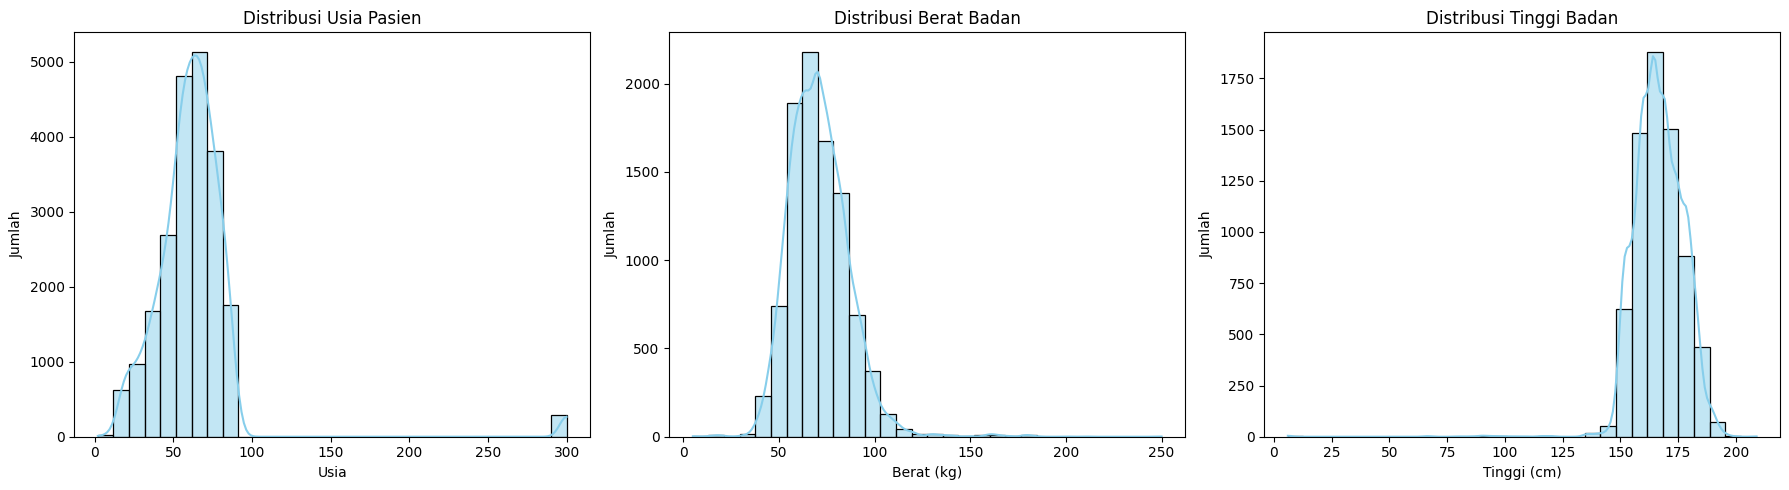

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur ukuran canvas dan jumlah subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 baris, 3 kolom

# Plot distribusi usia
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Usia Pasien')
axes[0].set_xlabel('Usia')
axes[0].set_ylabel('Jumlah')

# Plot distribusi berat badan
sns.histplot(df['weight'], bins=30, kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Distribusi Berat Badan')
axes[1].set_xlabel('Berat (kg)')
axes[1].set_ylabel('Jumlah')

# Plot distribusi tinggi badan (jika ada)
if df['height'].notna().sum() > 0:
    sns.histplot(df['height'], bins=30, kde=True, ax=axes[2], color='skyblue')
    axes[2].set_title('Distribusi Tinggi Badan')
    axes[2].set_xlabel('Tinggi (cm)')
    axes[2].set_ylabel('Jumlah')
else:
    axes[2].set_visible(False)  # Sembunyikan jika kosong

# Tata letak agar tidak tumpang tindih
plt.tight_layout()
plt.show()

/tmp/ipython-input-18-1367779997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='pastel')


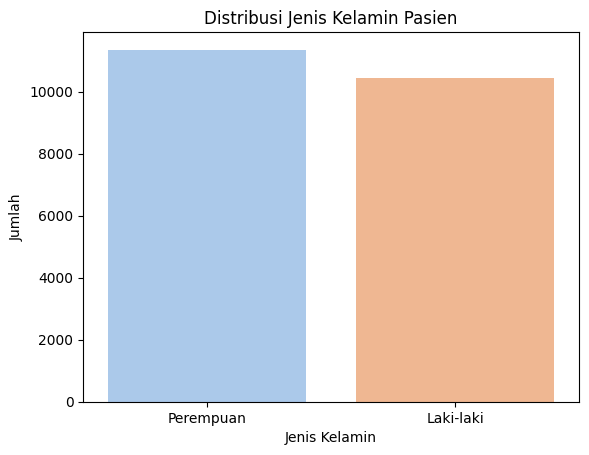

In [ ]:
# Jenis kelamin
sns.countplot(data=df, x='sex', palette='pastel')
plt.xticks(ticks=[0, 1], labels=['Perempuan', 'Laki-laki'])
plt.title('Distribusi Jenis Kelamin Pasien')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

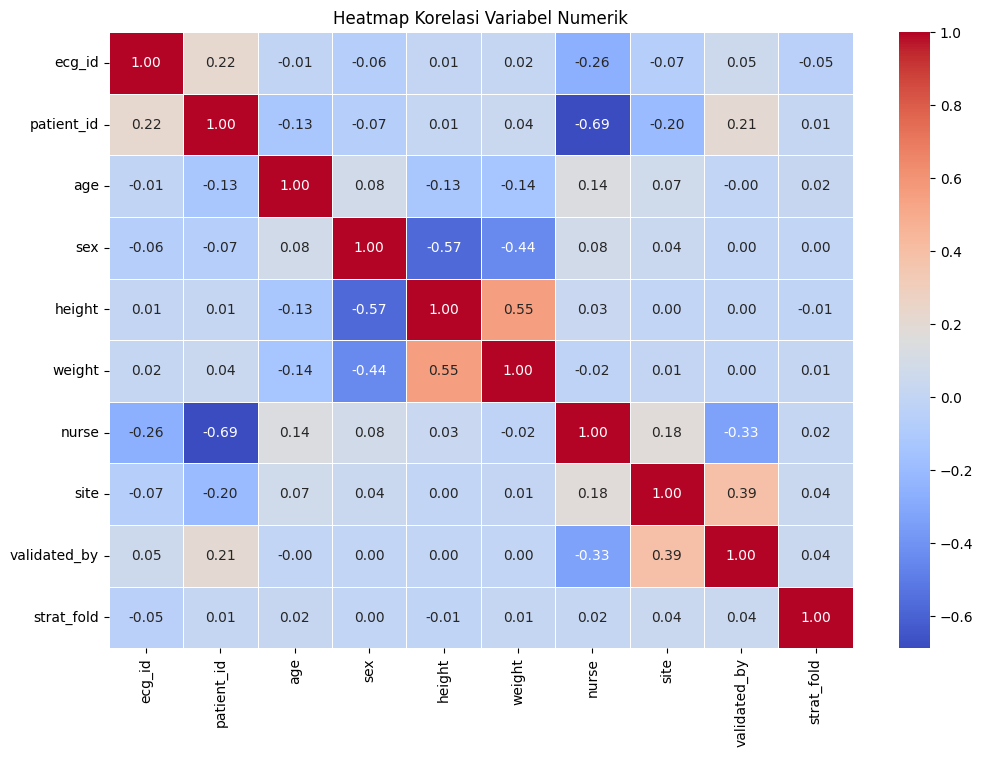

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil hanya kolom numerik
df_numerik = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi Pearson
corr_matrix = df_numerik.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

In [ ]:
used_cols = ['age', 'sex', 'height', 'weight', 'scp_codes', 'filename_lr']
df_meta_clean = df[used_cols].copy()
#pemilihan fitur

In [ ]:
dups = df_meta_clean.duplicated().sum()
print(f"Jumlah data duplikat: {dups}")

df_meta_clean.drop_duplicates(inplace=True)
#cek duplikasi data

Jumlah data duplikat: 0


In [ ]:
missing_summary = df_meta_clean.isnull().sum()
print("Jumlah Missing Values:\n", missing_summary[missing_summary > 0])
#cek missing values

Jumlah Missing Values:
 height    14825
weight    12378
dtype: int64


In [ ]:
df_meta_clean['height'] = df_meta_clean['height'].fillna(df_meta_clean['height'].median())
df_meta_clean['weight'] = df_meta_clean['weight'].fillna(df_meta_clean['weight'].median())

In [ ]:
# Cek di df_meta_clean, bukan df
df_meta_clean.isnull().sum()

,0
age,0
sex,0
height,0
weight,0
scp_codes,0
filename_lr,0


Jumlah missing values setelah di tangani:
age            0
sex            0
height         0
weight         0
scp_codes      0
filename_lr    0
dtype: int64


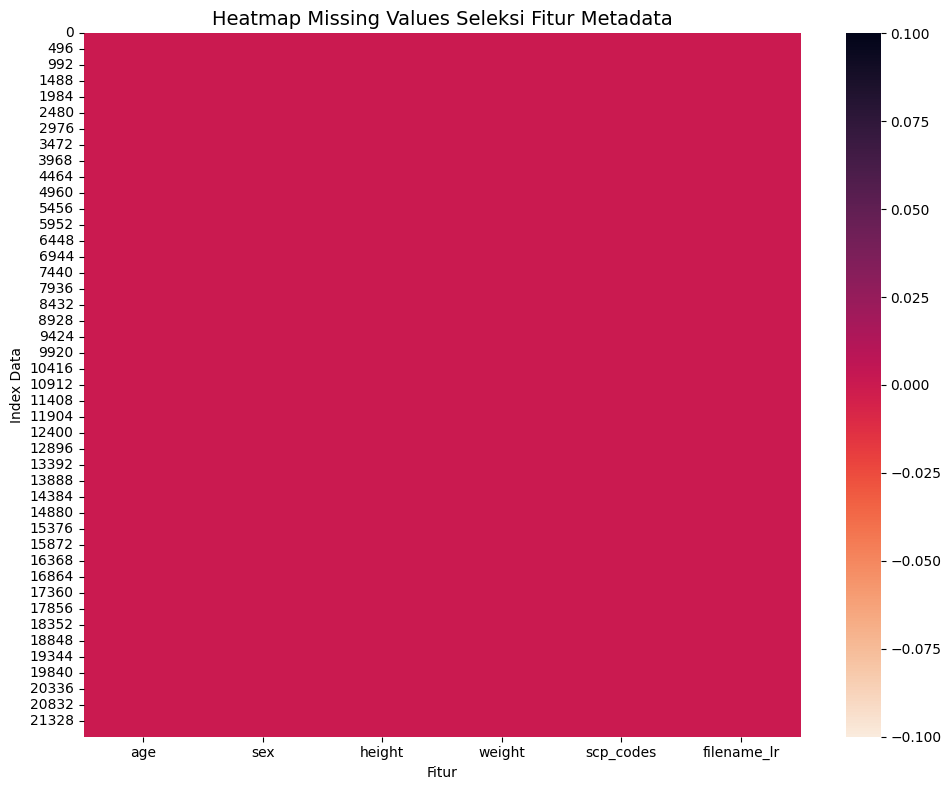

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Jumlah missing values setelah di tangani:")
print(df_meta_clean.isnull().sum())

# Visualisasi missing values hanya untuk metadata yang dipakai
plt.figure(figsize=(10, 8))
sns.heatmap(
    df_meta_clean.isnull(),
    cmap="rocket_r",
    cbar=True,

)

plt.title("Heatmap Missing Values Seleksi Fitur Metadata", fontsize=14)
plt.xlabel("Fitur")
plt.ylabel("Index Data")
plt.ylim(len(df_meta_clean), 0)  # ✅ Index tidak terbalik
plt.tight_layout()
plt.show()

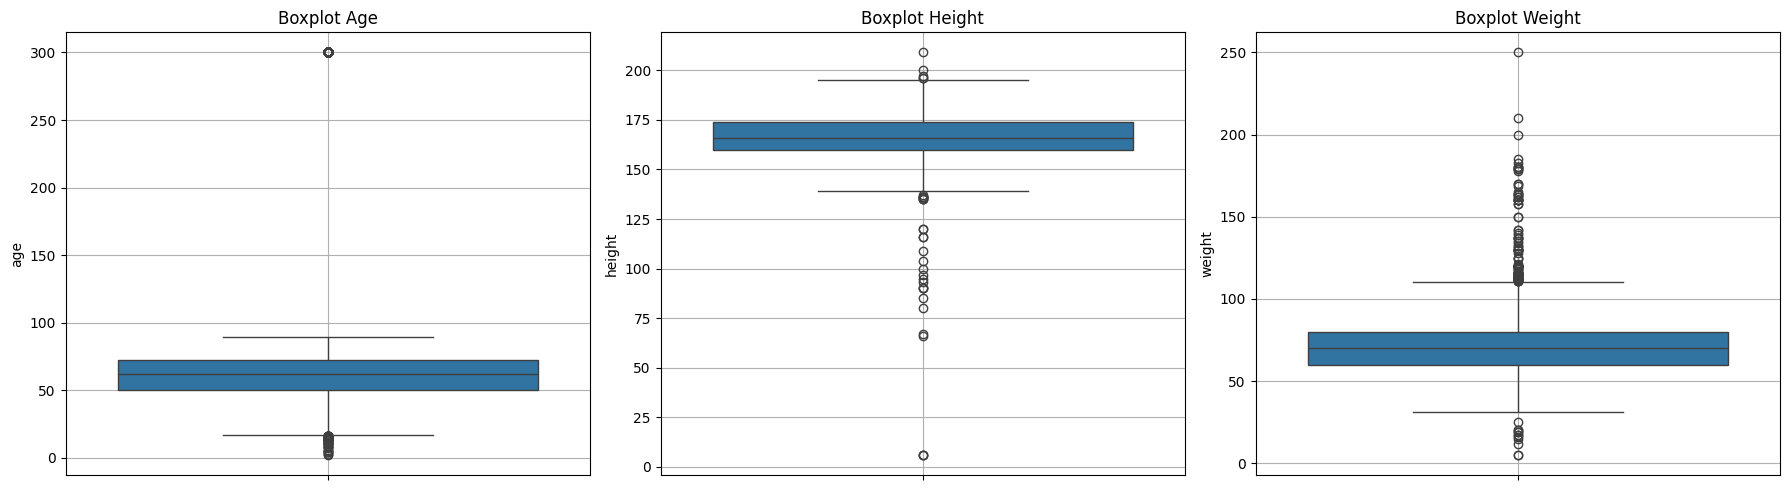

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kolom numerik yang ingin divisualisasikan
cols = ['age', 'height', 'weight']

# Ukuran figure keseluruhan
plt.figure(figsize=(18, 5))

# Loop untuk membuat subplot per fitur
for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)  # 1 baris, 3 kolom
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col.capitalize()}')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def analisis_outlier_iqr(df, column):
    """
    Gabungan fungsi statistik dan deteksi outlier menggunakan metode IQR.

    Output:
    - Baris-baris outlier
    - Jumlah outlier
    - Batas bawah dan atas (IQR)
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    n_outliers = len(outliers)

    print(f"Kolom: {column}")
    print(f"Jumlah outlier: {n_outliers}")
    print(f"Batas bawah (Q1 - 1.5*IQR): {lower_bound:.2f}")
    print(f"Batas atas  (Q3 + 1.5*IQR): {upper_bound:.2f}")

    return outliers

In [ ]:
outliers_age = analisis_outlier_iqr(df_meta_clean, 'age')
outliers_height = analisis_outlier_iqr(df_meta_clean, 'height')
outliers_weight = analisis_outlier_iqr(df_meta_clean, 'weight')

Kolom: age
Jumlah outlier: 385
Batas bawah (Q1 - 1.5*IQR): 17.00
Batas atas  (Q3 + 1.5*IQR): 105.00
Kolom: height
Jumlah outlier: 6865
Batas bawah (Q1 - 1.5*IQR): 166.00
Batas atas  (Q3 + 1.5*IQR): 166.00
Kolom: weight
Jumlah outlier: 8842
Batas bawah (Q1 - 1.5*IQR): 70.00
Batas atas  (Q3 + 1.5*IQR): 70.00


In [ ]:
df_meta_clean = df_meta_clean[(df_meta_clean['age'] >= 17) & (df_meta_clean['age'] <= 105)]
df_meta_clean = df_meta_clean[(df_meta_clean['height'] >= 130) & (df_meta_clean['height'] <= 210)]
df_meta_clean = df_meta_clean[(df_meta_clean['weight'] >= 30) & (df_meta_clean['weight'] <= 200)]

print("Jumlah data setelah pembersihan outlier:", len(df_meta_clean))
print("Statistik ringkas:")
print(df_meta_clean[['age', 'height', 'weight']].describe())

Jumlah data setelah pembersihan outlier: 21396
Statistik ringkas:
                age        height        weight
count  21396.000000  21396.000000  21396.000000
mean      59.726771    166.348990     70.583006
std       16.515507      5.466048     10.180657
min       17.000000    135.000000     31.000000
25%       50.000000    166.000000     70.000000
50%       61.000000    166.000000     70.000000
75%       72.000000    166.000000     70.000000
max       89.000000    209.000000    200.000000


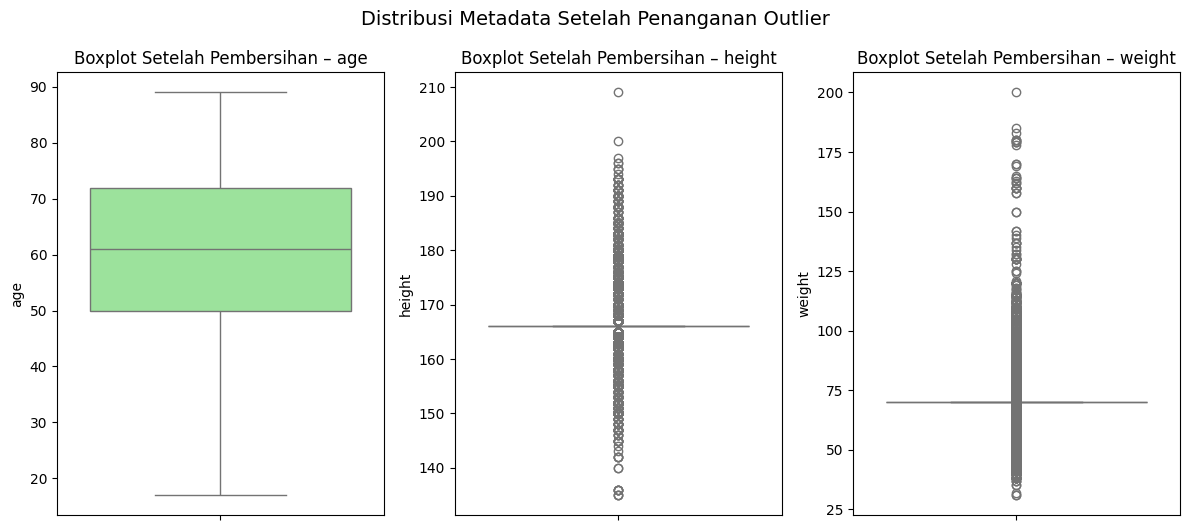

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang relevan
numerik_cols = ['age', 'height', 'weight']

# Buat visualisasi boxplot
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerik_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_meta_clean[col], color='lightgreen')
    plt.title(f'Boxplot Setelah Pembersihan – {col}')
    plt.tight_layout()

plt.suptitle('Distribusi Metadata Setelah Penanganan Outlier', fontsize=14, y=1.05)
plt.show()


In [ ]:
# Simpan dataset hasil preprocessing metadata
df_meta_clean.to_csv('df_metadata_cleaned.csv', index=False)

print("Dataset metadata yang telah dibersihkan berhasil disimpan sebagai 'df_metadata_cleaned.csv'")

Dataset metadata yang telah dibersihkan berhasil disimpan sebagai 'df_metadata_cleaned.csv'


In [ ]:
import pandas as pd

# Baca file CSV
df = pd.read_csv('/content/drive/MyDrive/PTB_XL_EKG//df_metadata_cleaned.csv')

# Cek jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

# Tampilkan nama semua kolom
print("Daftar nama kolom:")
print(df.columns)

# Tampilkan beberapa data awal
print("5 baris pertama:")
print(df.head())

🔢 Jumlah baris dan kolom: (21396, 6)

📋 Daftar nama kolom:
Index(['age', 'sex', 'height', 'weight', 'scp_codes', 'filename_lr'], dtype='object')

🔍 5 baris pertama:
    age  sex  height  weight                                 scp_codes  \
0  56.0    1   166.0    63.0  {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}   
1  19.0    0   166.0    70.0              {'NORM': 80.0, 'SBRAD': 0.0}   
2  37.0    1   166.0    69.0                {'NORM': 100.0, 'SR': 0.0}   
3  24.0    0   166.0    82.0                {'NORM': 100.0, 'SR': 0.0}   
4  19.0    1   166.0    70.0                {'NORM': 100.0, 'SR': 0.0}   

                 filename_lr  
0  records100/00000/00001_lr  
1  records100/00000/00002_lr  
2  records100/00000/00003_lr  
3  records100/00000/00004_lr  
4  records100/00000/00005_lr  


In [ ]:
import pandas as pd

# Muat file scp_statements.csv
df_scp = pd.read_csv('/content/drive/MyDrive/PTB_XL_EKG/scp_statements.csv')

# Tampilkan 5 baris pertama
df_scp.head()

,Unnamed: 0,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
0,NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
1,NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
2,DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
3,LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
4,NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [ ]:
print(df_scp.columns.tolist())

['Unnamed: 0', 'description', 'diagnostic', 'form', 'rhythm', 'diagnostic_class', 'diagnostic_subclass', 'Statement Category', 'SCP-ECG Statement Description', 'AHA code', 'aECG REFID', 'CDISC Code', 'DICOM Code']


In [ ]:
# Ambil hanya kode diagnostik
df_scp_diagnostic = df_scp[df_scp['diagnostic'] == 1]

# Buat dictionary mapping dari kode SCP → diagnostic_class
scp_to_class = df_scp_diagnostic.set_index('Unnamed: 0')['diagnostic_class'].to_dict()

# Cek contoh hasil mapping
print("Contoh mapping:")
for k, v in list(scp_to_class.items()):
    print(f"{k} → {v}")

Contoh mapping:
NDT → STTC
NST_ → STTC
DIG → STTC
LNGQT → STTC
NORM → NORM
IMI → MI
ASMI → MI
LVH → HYP
LAFB → CD
ISC_ → STTC
IRBBB → CD
1AVB → CD
IVCD → CD
ISCAL → STTC
CRBBB → CD
CLBBB → CD
ILMI → MI
LAO/LAE → HYP
AMI → MI
ALMI → MI
ISCIN → STTC
INJAS → MI
LMI → MI
ISCIL → STTC
LPFB → CD
ISCAS → STTC
INJAL → MI
ISCLA → STTC
RVH → HYP
ANEUR → STTC
RAO/RAE → HYP
EL → STTC
WPW → CD
ILBBB → CD
IPLMI → MI
ISCAN → STTC
IPMI → MI
SEHYP → HYP
INJIN → MI
INJLA → MI
PMI → MI
3AVB → CD
INJIL → MI
2AVB → CD


In [ ]:
# Cek jumlah baris duplikat berdasarkan kode SCP
duplikat = df_scp_diagnostic.duplicated(subset='Unnamed: 0').sum()
print(f"Jumlah baris duplikat berdasarkan kode SCP: {duplikat}")

Jumlah baris duplikat berdasarkan kode SCP: 0


In [ ]:
print("Jumlah missing values per kolom:")
print(df_scp_diagnostic.isnull().sum())

Jumlah missing values per kolom:
Unnamed: 0                        0
description                       0
diagnostic                        0
form                             40
rhythm                           44
diagnostic_class                  0
diagnostic_subclass               0
Statement Category                0
SCP-ECG Statement Description     0
AHA code                         22
aECG REFID                       32
CDISC Code                       31
DICOM Code                       35
dtype: int64


In [ ]:
label_yang_dipakai = ['NORM', 'MI', 'STTC']

# Buat dictionary hanya untuk label yang dipakai
scp_to_class_filtered = {
    k: v for k, v in scp_to_class.items() if v in label_yang_dipakai
}

# Tampilkan hasil
print("Jumlah kode SCP yang dipetakan ke label yang dipakai:", len(scp_to_class_filtered))
print("Contoh kode SCP terpilih:", list(scp_to_class_filtered.keys())[:10])


Jumlah kode SCP yang dipetakan ke label yang dipakai: 28
Contoh kode SCP terpilih: ['NDT', 'NST_', 'DIG', 'LNGQT', 'NORM', 'IMI', 'ASMI', 'ISC_', 'ISCAL', 'ILMI']


In [ ]:
import ast

def extract_dominant_class(code_dict_str, valid_codes, code_to_class):
    try:
        code_dict = ast.literal_eval(code_dict_str)
        filtered = {k: v for k, v in code_dict.items() if k in valid_codes}
        if not filtered:
            return None
        dominant_code = max(filtered, key=filtered.get)
        return code_to_class.get(dominant_code, None)
    except:
        return None

In [ ]:
df_meta_clean = pd.read_csv('/content/drive/MyDrive/PTB_XL_EKG/df_metadata_cleaned.csv')

In [ ]:
df_meta_clean['label_dominan'] = df_meta_clean['scp_codes'].apply(
    lambda x: extract_dominant_class(x, list(scp_to_class_filtered.keys()), scp_to_class_filtered)
)

In [ ]:
# Lihat jumlah yang gagal diekstrak
print("Jumlah label NaN:", df_meta_clean['label_dominan'].isna().sum())

# Lihat distribusi label
print("\nDistribusi label:")
print(df_meta_clean['label_dominan'].value_counts())

Jumlah label NaN: 2884

Distribusi label:
label_dominan
NORM    9399
MI      4821
STTC    4292
Name: count, dtype: int64


In [ ]:
df_meta_clean = df_meta_clean.dropna(subset=['label_dominan']).reset_index(drop=True)

In [ ]:
print(f"Jumlah data setelah membuang label kosong: {len(df_meta_clean)}")

Jumlah data setelah membuang label kosong: 18512


In [ ]:
print("Jumlah nilai NaN pada label_dominan:", df_meta_clean['label_dominan'].isna().sum())

Jumlah nilai NaN pada label_dominan: 0


In [ ]:
print(df_scp['description'].isna().sum())

0


In [ ]:
print("\nDistribusi label dominan:")
print(df_meta_clean['label_dominan'].value_counts())


Distribusi label dominan:
label_dominan
NORM    9399
MI      4821
STTC    4292
Name: count, dtype: int64


In [ ]:
print("Missing pada kolom description:", df_scp['description'].isna().sum())

Missing pada kolom description: 0


/tmp/ipython-input-53-2376102094.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_meta_clean, x='label_dominan', palette='Set2')


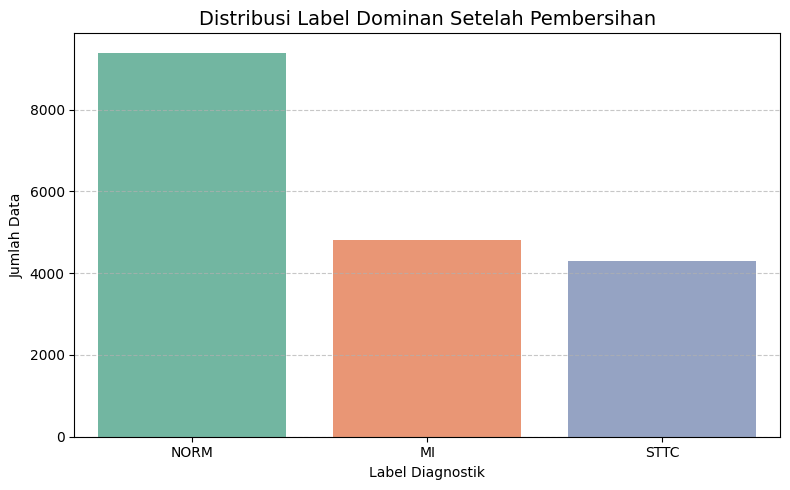

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df_meta_clean, x='label_dominan', palette='Set2')

plt.title("Distribusi Label Dominan Setelah Pembersihan", fontsize=14)
plt.xlabel("Label Diagnostik")
plt.ylabel("Jumlah Data")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Simpan ke CSV
df_meta_clean.to_csv('/content/drive/MyDrive/PTB_XL_EKG/df_metadata_cleaned_with_label.csv', index=False)

print("Metadata + label dominan berhasil digabung dan disimpan.")

✅ Metadata + label dominan berhasil digabung dan disimpan.


In [ ]:
import pandas as pd

# Load metadata yang sudah digabung dengan label dominan
df = pd.read_csv('/content/drive/MyDrive/PTB_XL_EKG/df_metadata_cleaned_with_label.csv')

# Tampilkan jumlah data dan nama kolom
print("Jumlah data:", len(df))
print(df.columns)

Jumlah data: 18512
Index(['age', 'sex', 'height', 'weight', 'scp_codes', 'filename_lr',
       'label_dominan'],
      dtype='object')


In [ ]:
import os

# Path dasar penyimpanan file .dat/.hea
base_path = '/content/ptbxl_data/'

# Kolom file EKG yang akan digunakan (frekuensi rendah)
df['full_path'] = base_path + df['filename_lr']

In [ ]:
import wfdb
import numpy as np
from tqdm import tqdm

# Fungsi untuk load sinyal dari path
def load_signals(paths):
    signals = []
    for p in tqdm(paths):
        signal, _ = wfdb.rdsamp(p)
        signals.append(signal)
    return np.array(signals, dtype=np.float32)

# Jalankan
ekg_signals = load_signals(df['full_path'])

print("Sinyal berhasil dimuat dengan shape:", ekg_signals.shape)

100%|██████████| 18512/18512 [00:46<00:00, 400.74it/s]


Sinyal berhasil dimuat dengan shape: (18512, 1000, 12)


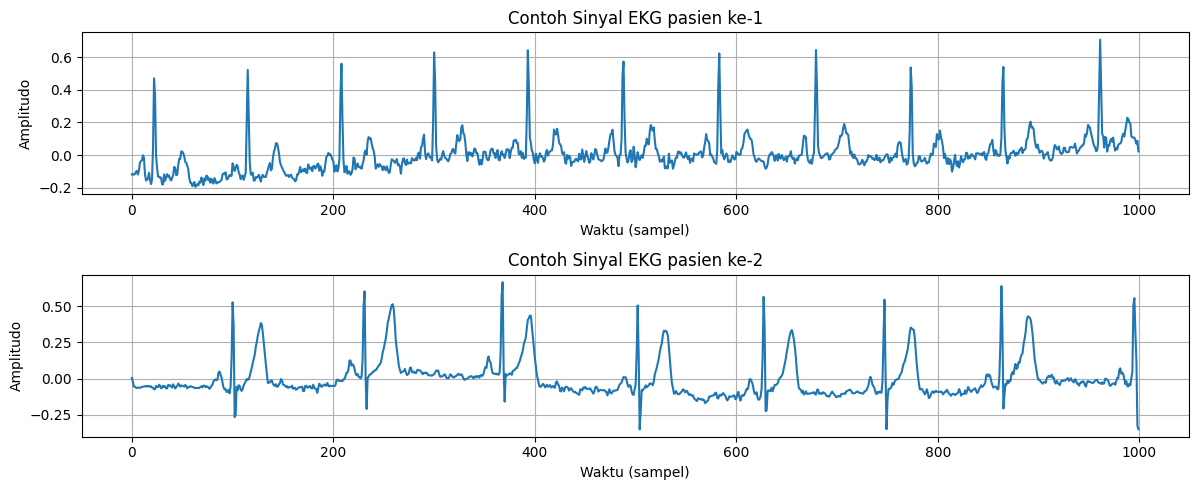

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi 2 sinyal pertama
plt.figure(figsize=(12, 5))
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.plot(ekg_signals[i][:, 0], label='Lead I')
    plt.title(f"Contoh Sinyal EKG pasien ke-{i+1}")
    plt.xlabel("Waktu (sampel)")
    plt.ylabel("Amplitudo")
    plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.signal import butter, filtfilt

def bandpass_filter(data, lowcut=0.5, highcut=40.0, fs=100, order=2):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')
    return filtfilt(b, a, data, axis=0)

# Terapkan filter ke semua sinyal
filtered_signals = np.array([bandpass_filter(sig) for sig in tqdm(ekg_signals)])

print("Sinyal telah difilter:", filtered_signals.shape)

100%|██████████| 18512/18512 [00:12<00:00, 1442.27it/s]


Sinyal telah difilter: (18512, 1000, 12)


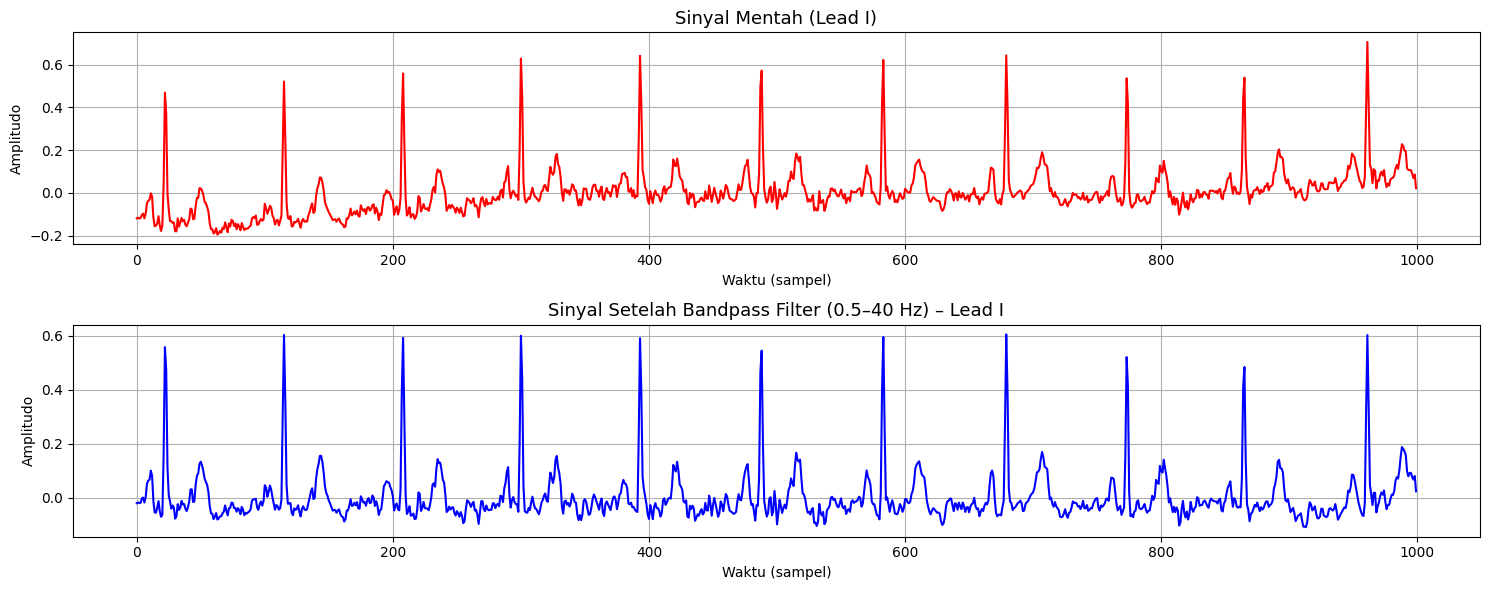

In [ ]:
import matplotlib.pyplot as plt

# Pilih sinyal pertama untuk contoh (Lead I = channel 0)
original = ekg_signals[0][:, 0]
filtered = filtered_signals[0][:, 0]

# Plot
plt.figure(figsize=(15, 6))

# Sinyal mentah
plt.subplot(2, 1, 1)
plt.plot(original, color='red')
plt.title("Sinyal Mentah (Lead I)", fontsize=13, color='black')
plt.xlabel("Waktu (sampel)")
plt.ylabel("Amplitudo")
plt.grid(True)

# Sinyal setelah bandpass filter
plt.subplot(2, 1, 2)
plt.plot(filtered, color='blue')
plt.title("Sinyal Setelah Bandpass Filter (0.5–40 Hz) – Lead I", fontsize=13, color='black')
plt.xlabel("Waktu (sampel)")
plt.ylabel("Amplitudo")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Reshape ke 2D untuk scaling
n_sample, n_length, n_lead = filtered_signals.shape
scaler = StandardScaler()
scaled_2d = scaler.fit_transform(filtered_signals.reshape(-1, n_lead))

# Kembalikan ke 3D
scaled_signals = scaled_2d.reshape(n_sample, n_length, n_lead)

print("Sinyal telah diskalakan:", scaled_signals.shape)

Sinyal telah diskalakan: (18512, 1000, 12)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['label_dominan'])

print("Kelas label:", label_encoder.classes_)
print("Contoh label encoded:", y_encoded[:10])

Kelas label: ['MI' 'NORM' 'STTC']
Contoh label encoded: [1 1 1 1 1 1 1 0 1 1]


In [ ]:
import joblib

# Simpan hasil preprocessing
np.save('/content/drive/MyDrive/PTB_XL_EKG/X_scaled.npy', scaled_signals)
np.save('/content/drive/MyDrive/PTB_XL_EKG/y_labels.npy', y_encoded)
np.save('/content/drive/MyDrive/PTB_XL_EKG/class_names.npy', label_encoder.classes_)

# Simpan scaler (taruh di Cell 3 agar tidak ketimpa)
scaler_path = '/content/drive/MyDrive/PTB_XL_EKG/standard_scaler.joblib'
joblib.dump(scaler, scaler_path)

print("Semua preprocessing selesai dan file disimpan:")
print("- X_scaled.npy")
print("- y_labels.npy")
print("- class_names.npy")
print(f"- Scaler: {scaler_path}")

Semua preprocessing selesai dan file disimpan:
- X_scaled.npy
- y_labels.npy
- class_names.npy
- Scaler: /content/drive/MyDrive/PTB_XL_EKG/standard_scaler.joblib


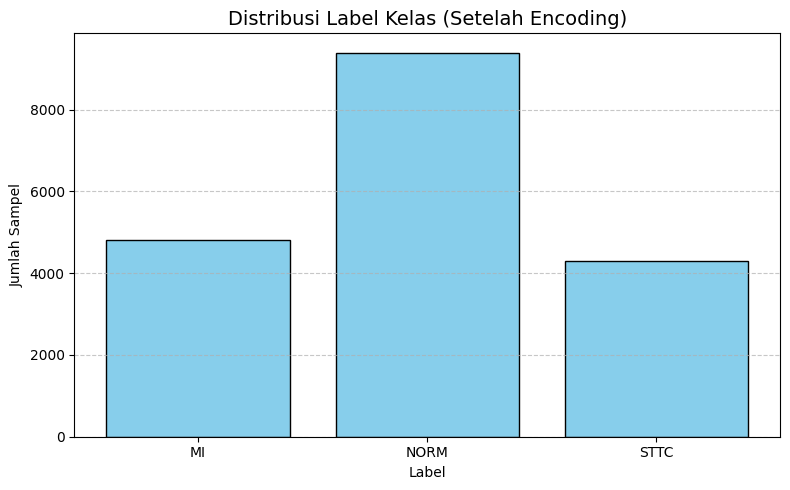

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Muat kembali label jika perlu
labels_enc = np.load('/content/drive/MyDrive/PTB_XL_EKG/y_labels.npy')
class_names = np.load('/content/drive/MyDrive/PTB_XL_EKG/class_names.npy' , allow_pickle=True)

# Hitung frekuensi tiap label
unique, counts = np.unique(labels_enc, return_counts=True)

# Buat plot
plt.figure(figsize=(8, 5))
plt.bar(class_names[unique], counts, color='skyblue', edgecolor='black')
plt.title("Distribusi Label Kelas (Setelah Encoding)", fontsize=14)
plt.xlabel("Label")
plt.ylabel("Jumlah Sampel")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter

# === Load Data Final dari Preprocessing Terakhir ===
X = np.load('/content/drive/MyDrive/PTB_XL_EKG/X_scaled.npy')
y = np.load('/content/drive/MyDrive/PTB_XL_EKG/y_labels.npy')
class_names = np.load('/content/drive/MyDrive/PTB_XL_EKG/class_names.npy', allow_pickle=True)

# === Split 90:10 Stratified ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

# === AUGMENTASI KELAS MINORITAS (Opsional: Bisa juga augment semua kelas) ===
def augment_signal(signal):
    noise = np.random.normal(0, 0.01, signal.shape)
    return signal + noise

# Pisahkan kelas
X_mi = X_train[y_train == 0]
y_mi = y_train[y_train == 0]
X_sttc = X_train[y_train == 2]
y_sttc = y_train[y_train == 2]

# Lakukan augmentasi
X_mi_aug = np.array([augment_signal(x) for x in X_mi])
y_mi_aug = y_mi.copy()
X_sttc_aug = np.array([augment_signal(x) for x in X_sttc])
y_sttc_aug = y_sttc.copy()

# Gabungkan kembali
X_train = np.concatenate([X_train, X_mi_aug, X_sttc_aug])
y_train = np.concatenate([y_train, y_mi_aug, y_sttc_aug])

# === Simpan Hasil Split ===
np.save('/content/drive/MyDrive/PTB_XL_EKG/X_train_3class.npy', X_train)
np.save('/content/drive/MyDrive/PTB_XL_EKG/y_train_3class.npy', y_train)
np.save('/content/drive/MyDrive/PTB_XL_EKG/X_test_3class.npy', X_test)
np.save('/content/drive/MyDrive/PTB_XL_EKG/y_test_3class.npy', y_test)

# === Cek Distribusi ===
print("Split selesai dan disimpan.")
print(f"Train shape: {X_train.shape}")
print(f"Test shape : {X_test.shape}")
print("Distribusi Train:", dict(Counter(y_train)))
print("Distribusi Test :", dict(Counter(y_test)))
print(" Class Names:", class_names)

Split selesai dan disimpan.
Train shape: (24861, 1000, 12)
Test shape : (1852, 1000, 12)
Distribusi Train: {np.int64(1): 8459, np.int64(0): 8678, np.int64(2): 7724}
Distribusi Test : {np.int64(1): 940, np.int64(2): 430, np.int64(0): 482}
 Class Names: ['MI' 'NORM' 'STTC']


In [ ]:
import numpy as np
import tensorflow as tf
import gc
import pickle
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, Dropout, Bidirectional, LSTM, GlobalAveragePooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive

# === SEEDING ===
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# === MOUNT DRIVE & LOAD DATA ===
drive.mount('/content/drive', force_remount=True)

X = np.load('/content/drive/MyDrive/PTB_XL_EKG/X_train_3class.npy')
y = np.load('/content/drive/MyDrive/PTB_XL_EKG/y_train_3class.npy')
class_names = np.load('/content/drive/MyDrive/PTB_XL_EKG/class_names.npy', allow_pickle=True)
num_classes = len(class_names)

# === MODEL FUNCTION ===
def build_cnn_bilstm(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, kernel_size=7, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Dropout(0.2)(x)

    x = Conv1D(128, kernel_size=5, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Dropout(0.3)(x)

    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = GlobalAveragePooling1D()(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=3e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# === STRATIFIED KFOLD ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
fold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}")

    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    y_train_cat = to_categorical(y_train_fold, num_classes=num_classes)
    y_val_cat = to_categorical(y_val_fold, num_classes=num_classes)

    weights = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train_fold),
        y=y_train_fold
    )
    class_weight_dict = dict(enumerate(weights))

    tf.keras.backend.clear_session()
    gc.collect()

    model = build_cnn_bilstm(X.shape[1:], num_classes)

    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-6, verbose=1)
    ]

    history = model.fit(
        X_train_fold, y_train_cat,
        validation_data=(X_val_fold, y_val_cat),
        epochs=100,
        batch_size=64,
        class_weight=class_weight_dict,
        callbacks=callbacks,
        verbose=1
    )

    # Simpan model & data val per fold
    model.save(f"/content/drive/MyDrive/PTB_XL_EKG/model_fold_{fold+1}.keras")
    np.save(f"/content/drive/MyDrive/PTB_XL_EKG/X_val_fold_{fold+1}.npy", X_val_fold)
    np.save(f"/content/drive/MyDrive/PTB_XL_EKG/y_val_fold_{fold+1}.npy", y_val_fold)

    # Simpan history per fold
    with open(f"/content/drive/MyDrive/PTB_XL_EKG/history_fold_{fold+1}.pkl", 'wb') as f:
        pickle.dump(history.history, f)

    # Simpan prediksi probabilitas mentah
    y_pred_probs = model.predict(X_val_fold)
    np.save(f"/content/drive/MyDrive/PTB_XL_EKG/y_pred_probs_fold_{fold+1}.npy", y_pred_probs)

    y_pred = np.argmax(y_pred_probs, axis=1)
    report = classification_report(y_val_fold, y_pred, target_names=class_names, output_dict=True)
    cm = confusion_matrix(y_val_fold, y_pred)

    fold_results.append({
        'fold': fold + 1,
        'accuracy': report['accuracy'],
        'f1_macro': np.mean([report[label]['f1-score'] for label in class_names]),
        'confusion_matrix': cm
    })

# === SIMPAN METRIK KE CSV ===
df = pd.DataFrame([{
    'Fold': res['fold'],
    'Accuracy': res['accuracy'],
    'F1_Macro': res['f1_macro']
} for res in fold_results])
df.to_csv('/content/drive/MyDrive/PTB_XL_EKG/kfold_evaluation_metrics.csv', index=False)

# === CETAK RINGKASAN HASIL K-FOLD ===
for res in fold_results:
    print(f"Fold {res['fold']} - Accuracy: {res['accuracy']:.4f}, F1 Macro: {res['f1_macro']:.4f}")
    print("Confusion Matrix:\n", res['confusion_matrix'])

Mounted at /content/drive
Fold 1
Epoch 1/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.6160 - loss: 0.8178 - val_accuracy: 0.7619 - val_loss: 0.5647 - learning_rate: 3.0000e-04
Epoch 2/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 36s 95ms/step - accuracy: 0.7609 - loss: 0.5811 - val_accuracy: 0.7830 - val_loss: 0.5272 - learning_rate: 3.0000e-04
Epoch 3/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.7806 - loss: 0.5323 - val_accuracy: 0.7937 - val_loss: 0.5013 - learning_rate: 3.0000e-04
Epoch 4/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.7937 - loss: 0.5047 - val_accuracy: 0.8049 - val_loss: 0.4871 - learning_rate: 3.0000e-04
Epoch 5/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.8047 - loss: 0.4767 - val_accuracy: 0.8033 - val_loss: 0.4921 - learning_rate: 3.0000e-04
Epoch 6/100
311/311 ━━━━━━━━━━━━━━━━━━━━ 39s 97ms/step - accuracy: 0.8115 - loss: 0.4604 - val_accuracy: 0.8152 - val_loss: 0.4682 - learning_rate: 3.0000e-04
Epoch 7/100


Mounted at /content/drive
Evaluasi Fold 1


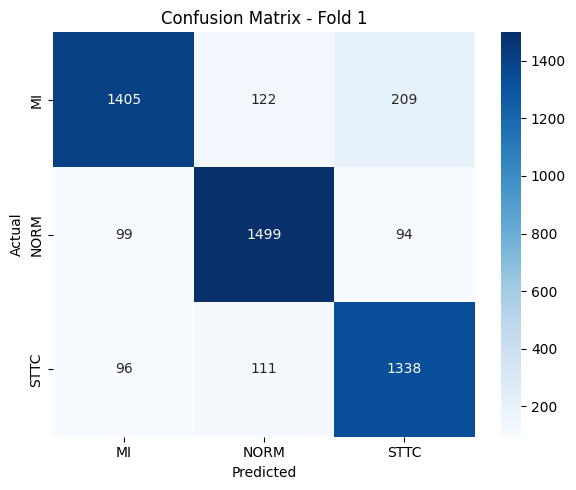

Evaluasi Fold 2


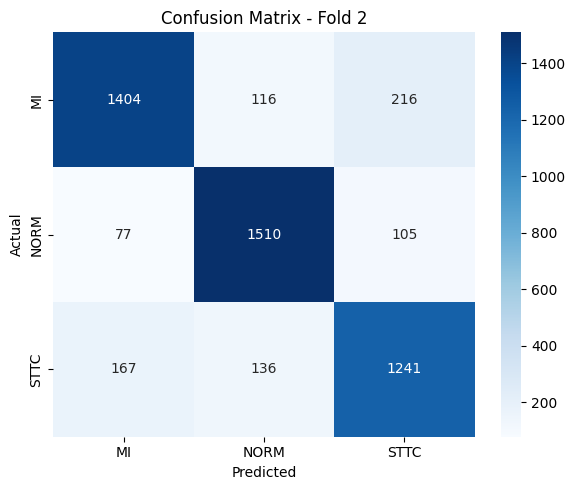

Evaluasi Fold 3


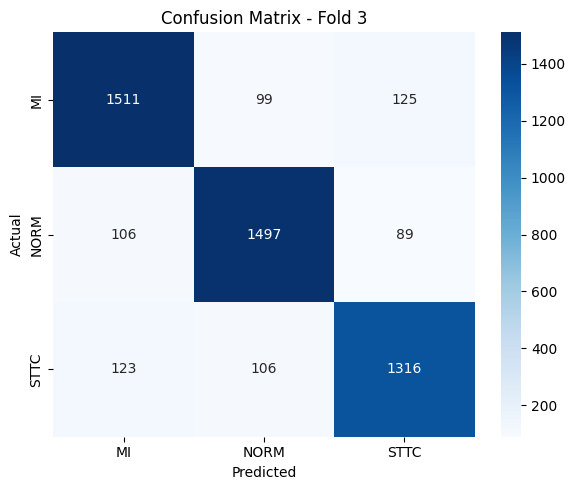

Evaluasi Fold 4


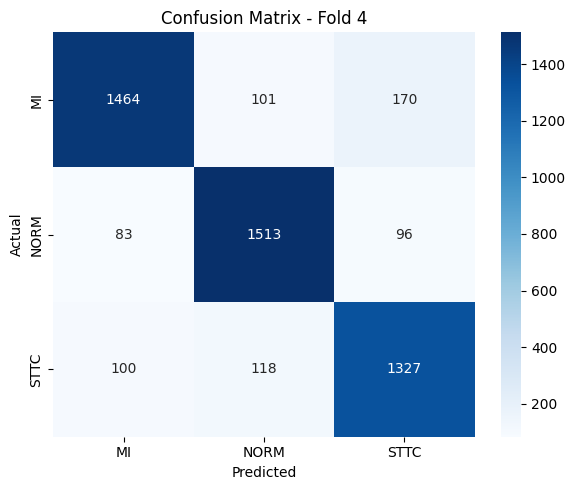

Evaluasi Fold 5


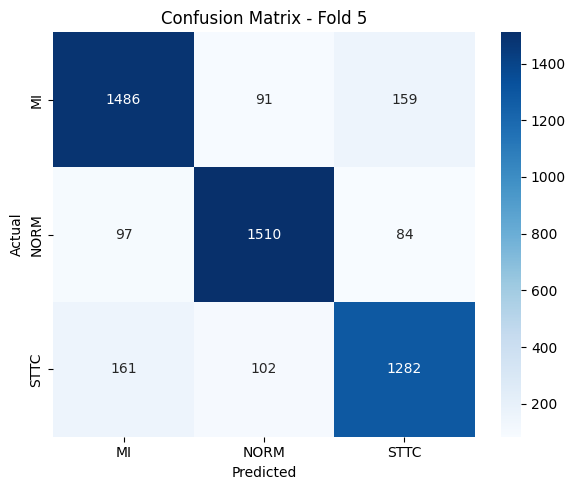


📁 Hasil evaluasi disimpan ke 'kfold_final_evaluation.csv'.

📈 Rata-rata Evaluasi:
Fold           3.000000
Accuracy       0.856884
F1_Macro       0.856205
F1_Weighted    0.856793
dtype: float64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from tensorflow.keras.models import load_model
from google.colab import drive

# === MOUNT GOOGLE DRIVE ===
drive.mount('/content/drive', force_remount=True)

class_names = np.load('/content/drive/MyDrive/PTB_XL_EKG/class_names.npy', allow_pickle=True)
num_folds = 5

# === EVALUASI SETIAP FOLD MENGGUNAKAN DATA VALIDASI MASING-MASING ===
fold_metrics = []

for fold in range(1, num_folds + 1):
    print(f"Evaluasi Fold {fold}")

    # === LOAD MODEL DAN DATA VALIDASI PER FOLD ===
    model_path = f'/content/drive/MyDrive/PTB_XL_EKG/model_fold_{fold}.keras'
    X_val = np.load(f'/content/drive/MyDrive/PTB_XL_EKG/X_val_fold_{fold}.npy')
    y_val = np.load(f'/content/drive/MyDrive/PTB_XL_EKG/y_val_fold_{fold}.npy')

    model = load_model(model_path)

    # === PREDIKSI ===
    y_pred_probs = model.predict(X_val, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # === HITUNG METRIK ===
    acc = accuracy_score(y_val, y_pred)
    f1_macro = f1_score(y_val, y_pred, average='macro')
    f1_weighted = f1_score(y_val, y_pred, average='weighted')
    cm = confusion_matrix(y_val, y_pred)

    # === SIMPAN HASILNYA ===
    fold_metrics.append({
        'Fold': fold,
        'Accuracy': acc,
        'F1_Macro': f1_macro,
        'F1_Weighted': f1_weighted,
        'Confusion_Matrix': cm
    })

    # === CONFUSION MATRIX ===
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# === SIMPAN HASIL KE CSV ===
df_report = pd.DataFrame([{
    'Fold': m['Fold'],
    'Accuracy': m['Accuracy'],
    'F1_Macro': m['F1_Macro'],
    'F1_Weighted': m['F1_Weighted']
} for m in fold_metrics])

df_report.to_csv('/content/drive/MyDrive/PTB_XL_EKG/kfold_final_evaluation.csv', index=False)
print("Hasil evaluasi disimpan ke 'kfold_final_evaluation.csv'.")

# === CETAK RATA-RATA ===
print("Rata-rata Evaluasi:")
print(df_report.mean(numeric_only=True))

In [ ]:
df_eval = pd.read_csv('/content/drive/MyDrive/PTB_XL_EKG/kfold_evaluation_metrics.csv')

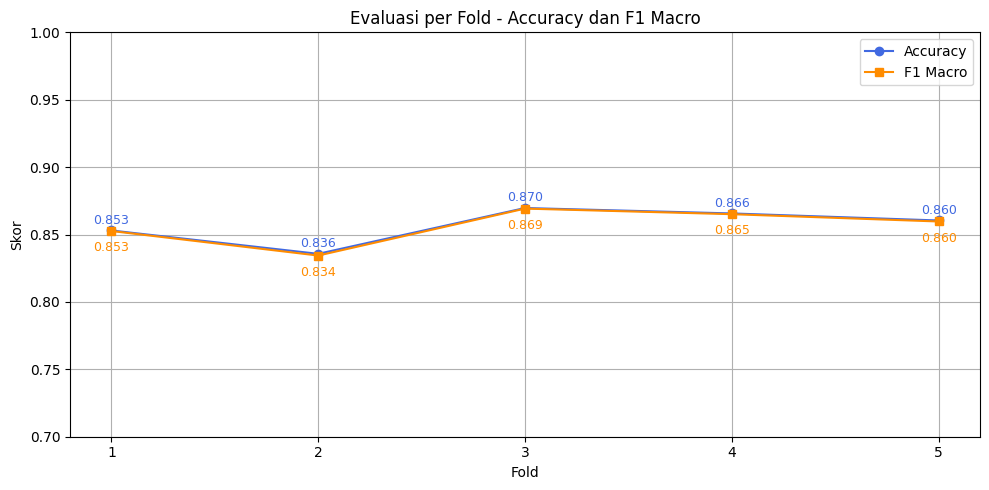

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy dan F1 Macro tiap Fold
plt.figure(figsize=(10, 5))
plt.plot(df_eval['Fold'], df_eval['Accuracy'], marker='o', label='Accuracy', color='royalblue')
plt.plot(df_eval['Fold'], df_eval['F1_Macro'], marker='s', label='F1 Macro', color='darkorange')

# Tambahkan anotasi nilai di atas/bawah titik
for i in range(len(df_eval)):
    plt.text(df_eval['Fold'][i], df_eval['Accuracy'][i] + 0.005,
             f"{df_eval['Accuracy'][i]:.3f}", ha='center', color='royalblue', fontsize=9)
    plt.text(df_eval['Fold'][i], df_eval['F1_Macro'][i] - 0.015,
             f"{df_eval['F1_Macro'][i]:.3f}", ha='center', color='darkorange', fontsize=9)

plt.title('Evaluasi per Fold - Accuracy dan F1 Macro')
plt.xlabel('Fold')
plt.ylabel('Skor')
plt.ylim(0.7, 1.0)
plt.grid(True)
plt.legend()
plt.xticks(df_eval['Fold'])
plt.tight_layout()

# Simpan sebagai gambar PNG (opsional)
plt.savefig('/content/drive/MyDrive/PTB_XL_EKG/plot_evaluasi_fold.png', dpi=300)

plt.show()

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import classification_report

all_y_true = []
all_y_pred = []

for i in range(1, 6):  # untuk 5 fold
    model = load_model(f"/content/drive/MyDrive/PTB_XL_EKG/model_fold_{i}.keras")
    X_val = np.load(f"/content/drive/MyDrive/PTB_XL_EKG/X_val_fold_{i}.npy")
    y_val = np.load(f"/content/drive/MyDrive/PTB_XL_EKG/y_val_fold_{i}.npy")

    y_pred = np.argmax(model.predict(X_val), axis=1)
    all_y_true.append(y_val)
    all_y_pred.append(y_pred)

156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

print("LAPORAN KLASIFIKASI PER FOLD")
print("-" * 70)

fold_metrics = []

for i, (y_true, y_pred) in enumerate(zip(all_y_true, all_y_pred)):
    print(f"Fold {i+1}")
    report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Ambil f1-score setiap kelas dan akurasi
    f1_scores = {label: report_dict[label]["f1-score"] for label in class_names}
    f1_scores['accuracy'] = report_dict['accuracy']
    fold_metrics.append(f1_scores)

# Buat DataFrame hasil per fold
df_metrics = pd.DataFrame(fold_metrics, index=[f'Fold {i+1}' for i in range(len(all_y_true))])

# Tampilkan rata-rata dan standar deviasi
print("RATA-RATA & STDEV METRIK")
print(df_metrics.agg(['mean', 'std']).round(4))

# Simpan hasil jika perlu
df_metrics.to_csv('/content/drive/MyDrive/PTB_XL_EKG/eval_report_from_saved_models.csv')
print("Hasil evaluasi disimpan sebagai 'eval_report_from_saved_models.csv'")

LAPORAN KLASIFIKASI PER FOLD
----------------------------------------------------------------------
Fold 1
              precision    recall  f1-score   support

          MI       0.88      0.81      0.84      1736
        NORM       0.87      0.89      0.88      1692
        STTC       0.82      0.87      0.84      1545

    accuracy                           0.85      4973
   macro avg       0.85      0.85      0.85      4973
weighted avg       0.85      0.85      0.85      4973

Fold 2
              precision    recall  f1-score   support

          MI       0.85      0.81      0.83      1736
        NORM       0.86      0.89      0.87      1692
        STTC       0.79      0.80      0.80      1544

    accuracy                           0.84      4972
   macro avg       0.83      0.83      0.83      4972
weighted avg       0.84      0.84      0.84      4972

Fold 3
              precision    recall  f1-score   support

          MI       0.87      0.87      0.87      1735
        

🔌 Menghubungkan ke Google Drive...
Mounted at /content/drive
memuat semua file history dari setiap fold
Semua file history berhasil dimuat.
 KURVA PEMBELAJARAN PER FOLD


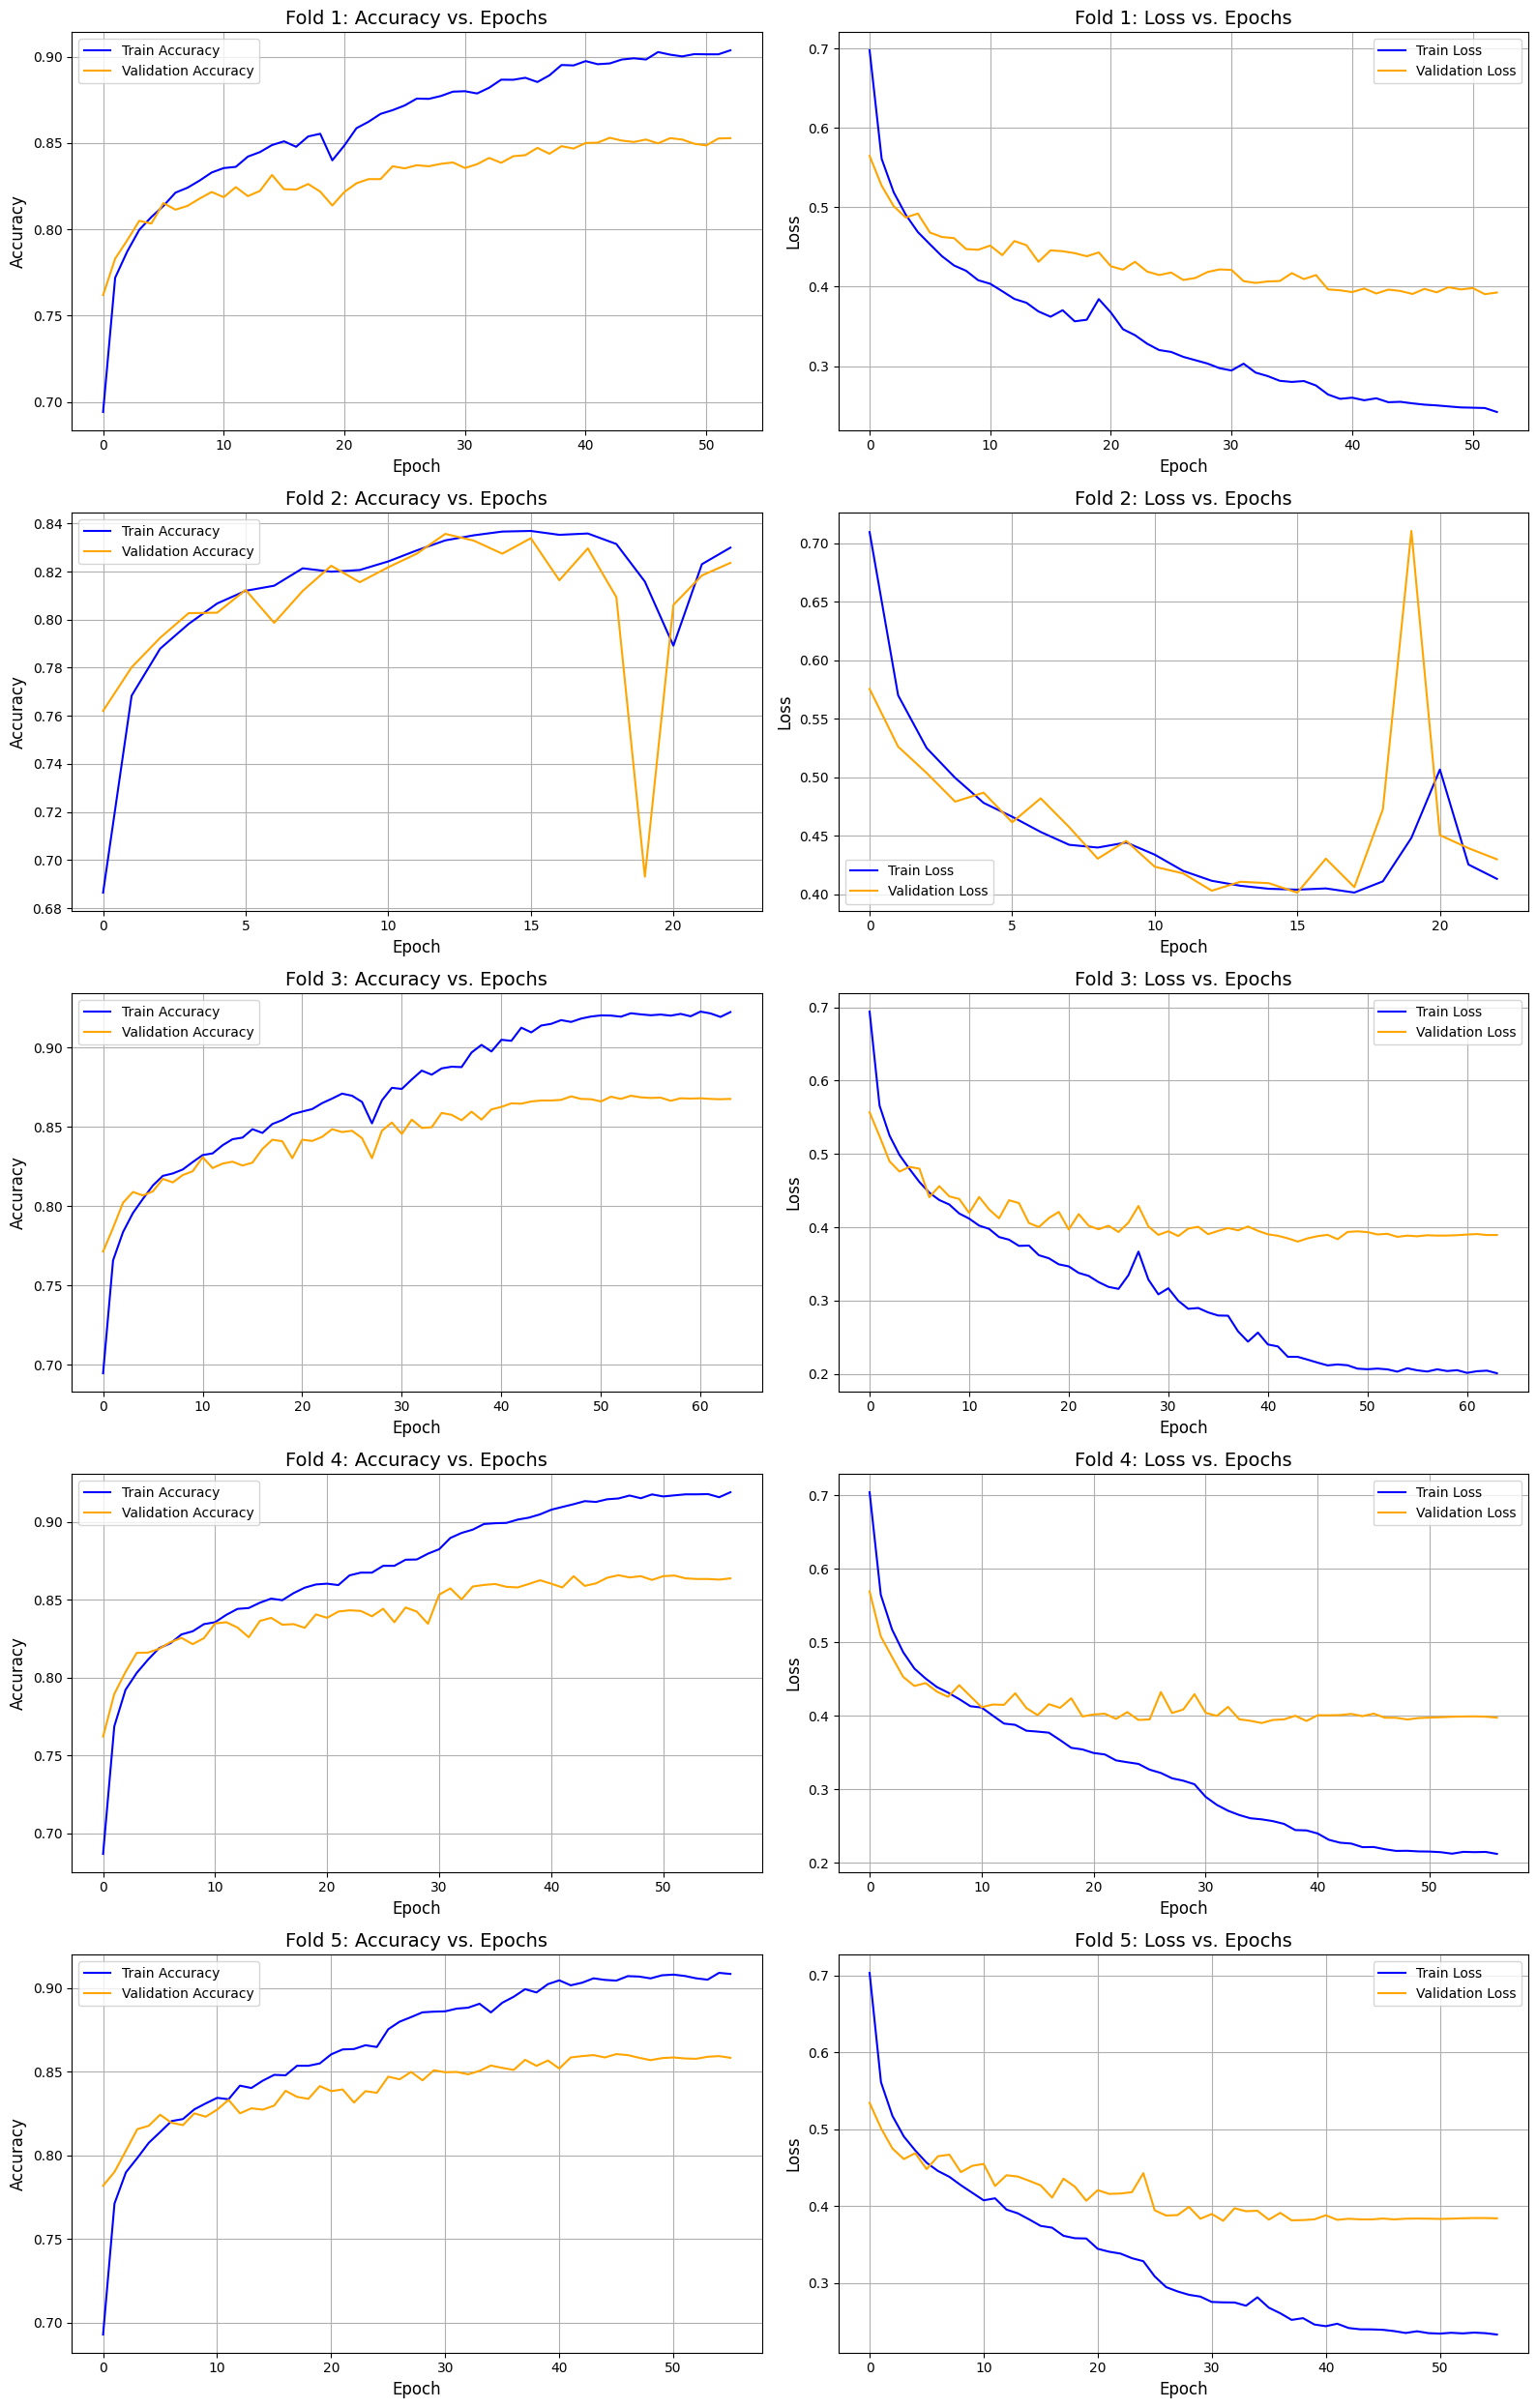

In [ ]:
import pickle
import matplotlib.pyplot as plt
import os
from google.colab import drive

# === MOUNT GOOGLE DRIVE & KONFIGURASI ===
print("🔌 Menghubungkan ke Google Drive...")
drive.mount('/content/drive', force_remount=True)
output_dir = '/content/drive/MyDrive/PTB_XL_EKG/'
num_folds = 5

# === MUAT SEMUA FILE HISTORY ===
print("memuat semua file history dari setiap fold")
histories = []
for i in range(1, num_folds + 1):
    history_path = os.path.join(output_dir, f'history_fold_{i}.pkl')
    try:
        with open(history_path, 'rb') as f:
            histories.append(pickle.load(f))
    except FileNotFoundError:
        print(f" Peringatan: File '{history_path}' tidak ditemukan. Fold ini akan dilewati.")

if not histories:
    print("Tidak ada file history yang berhasil dimuat. Pastikan skrip training sudah dijalankan.")
else:
    print("Semua file history berhasil dimuat.")

    #VISUALISASI KURVA PEMBELAJARAN PER FOLD
    print(" KURVA PEMBELAJARAN PER FOLD")

    plt.figure(figsize=(16, 5 * num_folds))

    for i, history in enumerate(histories):
        # Plot Akurasi
        plt.subplot(num_folds, 2, 2*i + 1)
        plt.plot(history['accuracy'], label='Train Accuracy', color='blue')
        plt.plot(history['val_accuracy'], label='Validation Accuracy', color='orange')
        plt.title(f'Fold {i+1}: Accuracy vs. Epochs', fontsize=14)
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Accuracy', fontsize=12)
        plt.legend()
        plt.grid(True)

        # Plot Loss
        plt.subplot(num_folds, 2, 2*i + 2)
        plt.plot(history['loss'], label='Train Loss', color='blue')
        plt.plot(history['val_loss'], label='Validation Loss', color='orange')
        plt.title(f'Fold {i+1}: Loss vs. Epochs', fontsize=14)
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Loss', fontsize=12)
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

Memuat fold 1...
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step
Memuat fold 2...
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step
Memuat fold 3...
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step
Memuat fold 4...
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step
Memuat fold 5...
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


/tmp/ipython-input-18-1260498948.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', num_classes)


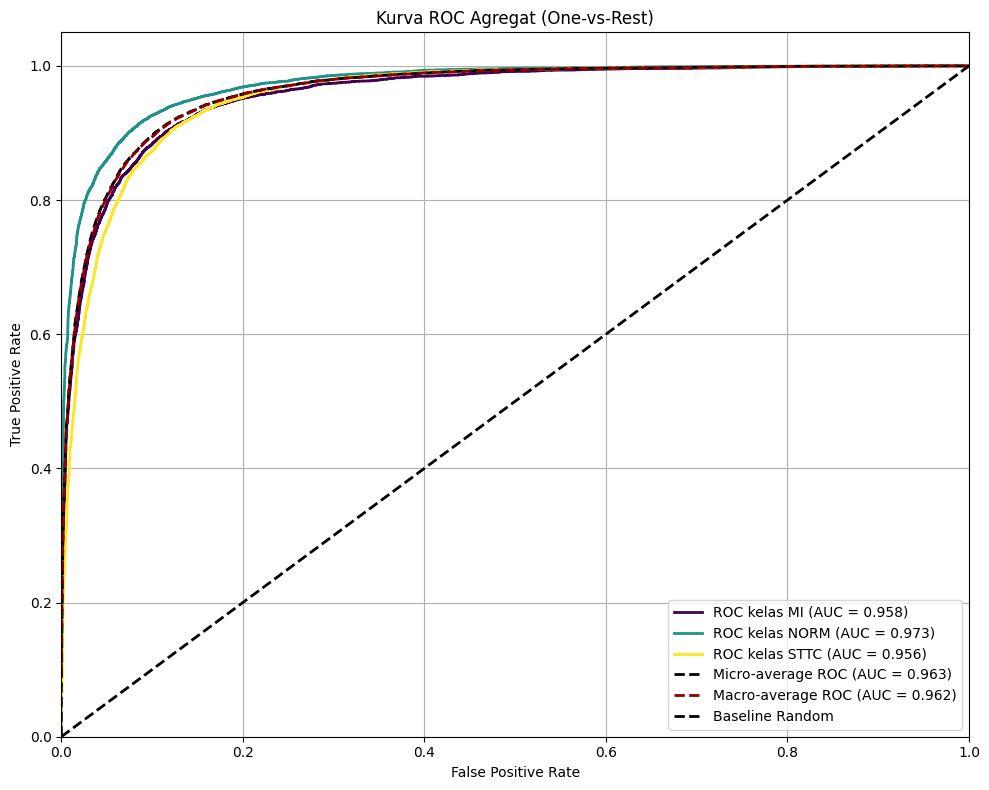

AUC (termasuk micro dan macro average) disimpan di 'roc_auc_scores_with_avg.csv'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
import pandas as pd
import os

# === KONFIGURASI ===
folds = 5
num_classes = 3
class_names = np.load('/content/drive/MyDrive/PTB_XL_EKG/class_names.npy', allow_pickle=True)

# === INISIALISASI ===
all_y_true = []
all_y_proba = []

# === LOOP UNTUK MEMUAT MODEL DAN PREDIKSI ===
for i in range(1, folds + 1):
    print(f"Memuat fold {i}...")
    model = load_model(f"/content/drive/MyDrive/PTB_XL_EKG/model_fold_{i}.keras")
    X_val = np.load(f"/content/drive/MyDrive/PTB_XL_EKG/X_val_fold_{i}.npy")
    y_val = np.load(f"/content/drive/MyDrive/PTB_XL_EKG/y_val_fold_{i}.npy")

    y_pred_proba = model.predict(X_val)

    all_y_true.append(y_val)
    all_y_proba.append(y_pred_proba)

# === GABUNG SEMUA FOLD ===
y_val_all = np.concatenate(all_y_true)
y_proba_all = np.concatenate(all_y_proba)

# === BINARISASI LABEL ===
y_val_bin = label_binarize(y_val_all, classes=range(num_classes))

# === ROC KURVA PER KELAS ===
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_proba_all[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# === MICRO-AVERAGE ===
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_proba_all.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# === MACRO-AVERAGE ===
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Interpolasi semua TPR ke grid FPR yang sama
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= num_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# === PLOT ===
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('viridis', num_classes)

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC kelas {class_names[i]} (AUC = {roc_auc[i]:.3f})', color=colors(i))

# Tambahkan micro dan macro
plt.plot(fpr["micro"], tpr["micro"], linestyle='--', color='black',
         label=f'Micro-average ROC (AUC = {roc_auc["micro"]:.3f})', lw=2)
plt.plot(fpr["macro"], tpr["macro"], linestyle='--', color='darkred',
         label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.3f})', lw=2)

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Baseline Random')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC Agregat (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === OPSIONAL: SIMPAN SEMUA AUC ===
df_auc = pd.DataFrame({
    'Class': list(class_names) + ['micro-average', 'macro-average'],
    'AUC Score': [roc_auc[i] for i in range(num_classes)] + [roc_auc["micro"], roc_auc["macro"]]
})
df_auc.to_csv('/content/drive/MyDrive/PTB_XL_EKG/roc_auc_scores_with_avg.csv', index=False)
print("AUC (termasuk micro dan macro average) disimpan di 'roc_auc_scores_with_avg.csv'")

In [ ]:
# === PLOT PER KELAS, MICRO, dan MACRO ===
output_dir = '/content/drive/MyDrive/PTB_XL_EKG/ROC_Per_Class'
os.makedirs(output_dir, exist_ok=True)

# === PER KELAS ===
for i in range(num_classes):
    plt.figure(figsize=(6, 6))
    plt.plot(fpr[i], tpr[i], color='blue', lw=2,
             label=f'ROC kelas {class_names[i]} (AUC = {roc_auc[i]:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Baseline Random')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Kelas {class_names[i]}')
    plt.legend(loc="lower right")
    plt.grid(True)

    save_path = os.path.join(output_dir, f'roc_curve_{class_names[i]}.png')
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()
    print(f"ROC kelas {class_names[i]} disimpan di: {save_path}")

# === MICRO AVERAGE ===
plt.figure(figsize=(6, 6))
plt.plot(fpr["micro"], tpr["micro"], color='green', lw=2,
         label=f'Micro-average ROC (AUC = {roc_auc["micro"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Baseline Random')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

save_path_micro = os.path.join(output_dir, 'roc_curve_micro_average.png')
plt.tight_layout()
plt.savefig(save_path_micro)
plt.close()
print(f"📸 ROC Micro-average disimpan di: {save_path_micro}")

# === MACRO AVERAGE ===
plt.figure(figsize=(6, 6))
plt.plot(fpr["macro"], tpr["macro"], color='darkred', lw=2,
         label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Baseline Random')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

save_path_macro = os.path.join(output_dir, 'roc_curve_macro_average.png')
plt.tight_layout()
plt.savefig(save_path_macro)
plt.close()
print(f"ROC Macro-average disimpan di: {save_path_macro}")

ROC kelas MI disimpan di: /content/drive/MyDrive/PTB_XL_EKG/ROC_Per_Class/roc_curve_MI.png
ROC kelas NORM disimpan di: /content/drive/MyDrive/PTB_XL_EKG/ROC_Per_Class/roc_curve_NORM.png
ROC kelas STTC disimpan di: /content/drive/MyDrive/PTB_XL_EKG/ROC_Per_Class/roc_curve_STTC.png
📸 ROC Micro-average disimpan di: /content/drive/MyDrive/PTB_XL_EKG/ROC_Per_Class/roc_curve_micro_average.png
ROC Macro-average disimpan di: /content/drive/MyDrive/PTB_XL_EKG/ROC_Per_Class/roc_curve_macro_average.png


DISTRIBUSI PREDIKSI VS LABEL ASLI (AGREGAT)


/tmp/ipython-input-11-422372203.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label Asli', data=df_dist, order=class_names, palette='Blues')
/tmp/ipython-input-11-422372203.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label Prediksi', data=df_dist, order=class_names, palette='Greens')


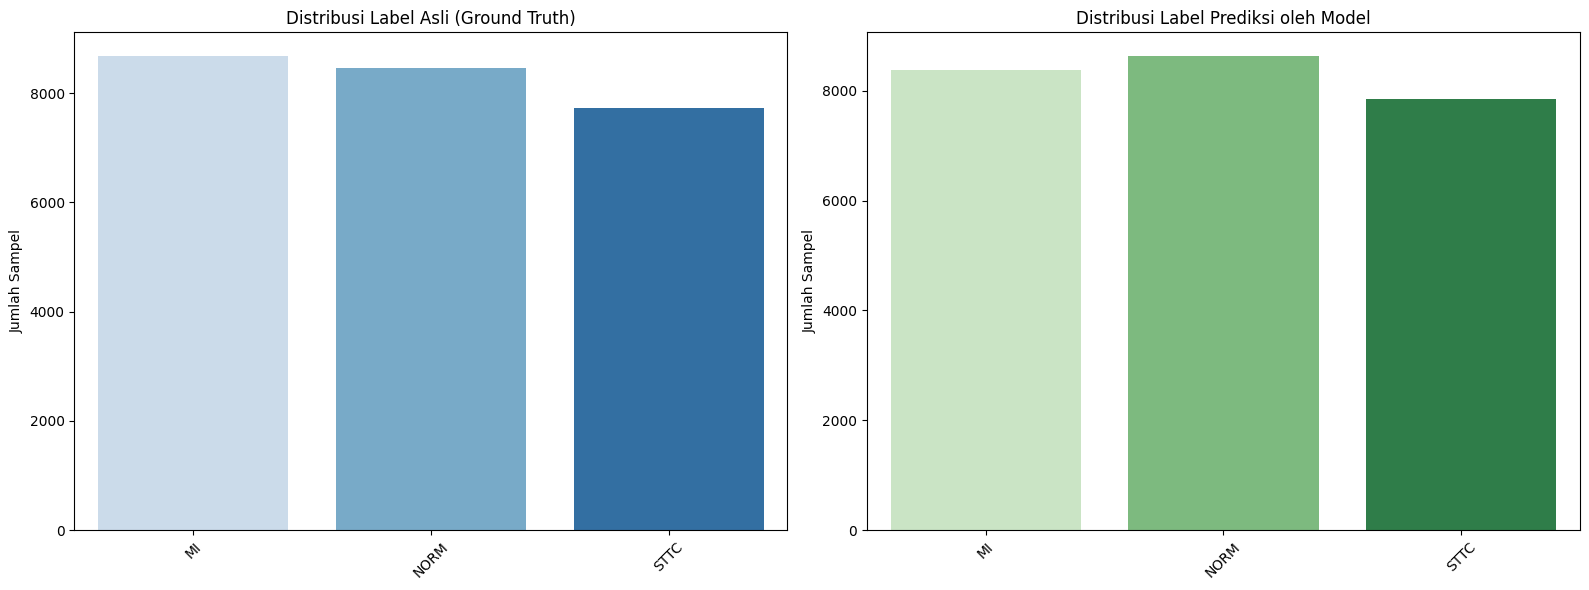

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("DISTRIBUSI PREDIKSI VS LABEL ASLI (AGREGAT)")

# === FLATTEN LIST OF ARRAYS JADI 1D ARRAY ===
y_true_flat = np.concatenate(all_y_true)
y_pred_flat = np.concatenate(all_y_pred)

# === BUAT DATAFRAME UNTUK VISUALISASI ===
df_dist = pd.DataFrame({
    'Label Asli': [class_names[i] for i in y_true_flat],
    'Label Prediksi': [class_names[i] for i in y_pred_flat]
})

# === PLOT COUNT DISTRIBUSI LABEL ===
plt.figure(figsize=(16, 6))

# Subplot 1: Distribusi Label Asli
plt.subplot(1, 2, 1)
sns.countplot(x='Label Asli', data=df_dist, order=class_names, palette='Blues')
plt.title('Distribusi Label Asli (Ground Truth)')
plt.ylabel('Jumlah Sampel')
plt.xlabel('')
plt.xticks(rotation=45)

# Subplot 2: Distribusi Label Prediksi
plt.subplot(1, 2, 2)
sns.countplot(x='Label Prediksi', data=df_dist, order=class_names, palette='Greens')
plt.title('Distribusi Label Prediksi oleh Model')
plt.ylabel('Jumlah Sampel')
plt.xlabel('')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

df_cm_agg = pd.DataFrame(cm_agg, index=class_names, columns=class_names)
df_cm_agg.to_csv('/content/drive/MyDrive/PTB_XL_EKG/confusion_matrix_agg_raw.csv')

df_cm_norm = pd.DataFrame(cm_normalized, index=class_names, columns=class_names)
df_cm_norm.to_csv('/content/drive/MyDrive/PTB_XL_EKG/confusion_matrix_agg_normalized.csv')

print("Confusion matrix (raw dan normalized) disimpan ke Drive.")

Confusion matrix (raw dan normalized) disimpan ke Drive.


In [ ]:
full_summary = df_metrics.copy()
full_summary['Fold'] = [f'Fold {i+1}' for i in range(len(df_metrics))]
cols = ['Fold'] + [col for col in full_summary.columns if col != 'Fold']
full_summary = full_summary[cols]

full_summary.to_csv('/content/drive/MyDrive/PTB_XL_EKG/summary_f1_per_class.csv', index=False)
print("Ringkasan performa per kelas per fold disimpan.")

Ringkasan performa per kelas per fold disimpan.


In [ ]:
best_model_fold = int(df_report['F1_Macro'].idxmax()) + 1
print(f"Model terbaik berada di Fold {best_model_fold} — bisa dipakai untuk deployment.")

Model terbaik berada di Fold 3 — bisa dipakai untuk deployment.
